<a href="https://colab.research.google.com/github/omarbak/Pikachu_task/blob/master/Pikachu_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the pictures from Github.
- As a first step, we have to clone the github link.
- After cloning, we have to copy the path of the files, so we can import all the images and put them in a list/array.


In [1]:
!git clone https://github.com/Contractfit/cf_testing

Cloning into 'cf_testing'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1003 (delta 0), reused 0 (delta 0), pack-reused 1000
Receiving objects: 100% (1003/1003), 128.76 MiB | 17.98 MiB/s, done.
Resolving deltas: 100% (6/6), done.


## Paths.
- first path is for the non pikachu images
- second path is for the pikachu images
- copying the path is easy on google colab that's why it is recommended to use.

In [2]:
path_1="/content/cf_testing/pikachu/pikachu_dataset/not_pikachu"
path_2="/content/cf_testing/pikachu/pikachu_dataset/pikachu"

### Visualizing the images (and importing some libraries)
- As a first step after cloning the Github Link, we can start by importing the basic libraries that would help us to visualize the images, so we can familiarize with our dataset.

In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob

### Script to get the images from their folders. 
- the following is a small script to read and collect the images from the file.
- first we access the folder, we read all the images one by one and append them to a list or array.


In [4]:
def get_images(path_folder):
  data_path = os.path.join(path_folder,"*g")
  files = glob.glob(data_path)
  images_list = []
  for pictures in files:
    image = cv2.imread(pictures)
    images_list.append(image)
  return(images_list)


In [5]:
not_pikachu = get_images(path_1)
pikachu = get_images(path_2)

#### Small script to visualize the images.
- takes in the folder and how many images we want to see 

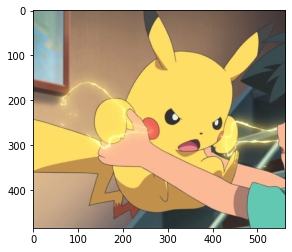

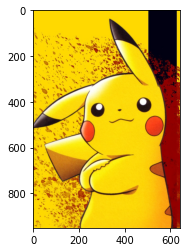

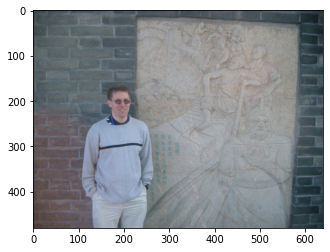

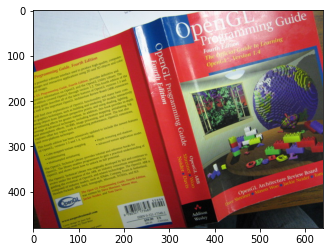

In [6]:
## visualizing few images
def show_images_basic(images,howmany=2):
  for i in range(howmany):
    plt.imshow(images[i][...,::-1])
    plt.show()

show_images_basic(pikachu)
show_images_basic(not_pikachu)



### Creating the labels.
- since we are doing a classification problem, we need labels, since it is a supervised model.
- i chose 1 to be a pikachu picture and 0 for non pikachu images.
- create the labels into list using list comprehension (basic level)
- collect all labels together in one list (ordered since we will shuffle them later on when we do the train test split)

In [7]:
pikachu_labels = [1 for i in range(len(pikachu))]
not_pikachu_labels = [0 for i in range(len(not_pikachu))]
all_labels = pikachu_labels+not_pikachu_labels
# print(all_labels)

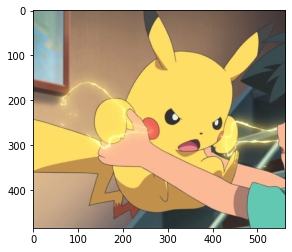

In [8]:
all_pictures = pikachu+not_pikachu
plt.imshow(all_pictures[0][...,::-1])

### Resizing all pictures.
- it is clear that our images arent of the same size if we look at the axes of different images.
- therefore it is necessary to resize all to one size.
- we will use some external functions that would facilitate the job (resize from skimage.transform)
- i decided to choose 224 so that the pictures still show nice quality.


In [9]:
from skimage.transform import resize
from skimage import io

In [10]:
def resizing(dimension,data=all_pictures):
    DATASET = np.array([resize(images, (dimension, dimension, 3)) for images in data]).astype('float32')
    return DATASET
DATASET = resizing(224)

In [11]:
## the dataset now has all our pictures resized to 224*224*3
DATASET.shape

(944, 224, 224, 3)

### Image Scaler.
- import from sklearn the standardScaler
- apply it on each image dimension

In [12]:
from sklearn.preprocessing import StandardScaler


def image_scaler(dataset):
    ss = StandardScaler()
    scaled_images = []
    for image in dataset:
      for channel in range(image.shape[2]): ## channels of the colored images.
          image[:, :, channel] = ss.fit_transform(image[:, :, channel])
      scaled_images.append(image)
    scaled_images_array = np.array(scaled_images)
    return (scaled_images_array)

# scaled_images  = image_scaler(DATASET)



In [13]:
# print("Scaled image array:",scaled_images[5][0][0])
# print("Original image array:",pikachu[5][0][0])
# show_images_basic(scaled_images,1)

### Splitting the data.
- we split the data into train test set
- we check the sizes for correctness
- we visualize some pictures with their labels to make sure everything is in place

In [14]:
from sklearn.model_selection import train_test_split
np.random.seed(21)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(DATASET,np.array(all_labels),test_size=0.15, random_state=21)
print("Classifier Training Images Size:", Xtrain.shape)
print("Classifier Training Labels Size:", Ytrain.shape)
print("Classifier Test Images Size:", Xtest.shape)
print("Classifier Test Labels Size:", Ytest.shape)

Classifier Training Images Size: (802, 224, 224, 3)
Classifier Training Labels Size: (802,)
Classifier Test Images Size: (142, 224, 224, 3)
Classifier Test Labels Size: (142,)


TRAINING DATA


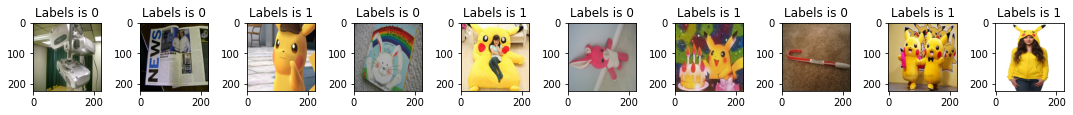

TESTING DATA


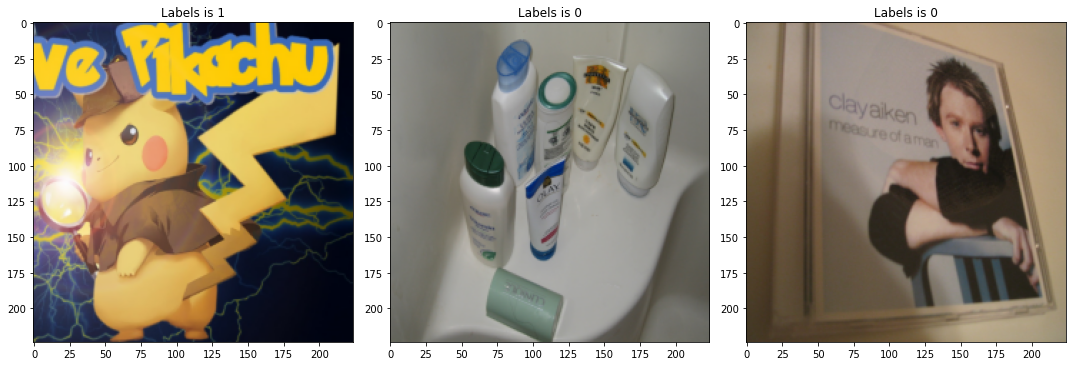

In [15]:
## similar to the previous function 
def show_images(images,labels=None,howmany=1):
    fig,axes = plt.subplots(1,howmany,figsize=(15,15))
    for i in range(howmany):
        axes[i].imshow(images[i][...,::-1])
        axes[i].set_title("Labels is {}".format(labels[i]))
    plt.tight_layout()    
    plt.show()
print("TRAINING DATA")
show_images(Xtrain,Ytrain,10)
print("TESTING DATA")
show_images(Xtest,Ytest,3)

### Importing all the necessary packages/libraries.
- some are unused
- copy pasted them from my assignment
- next step is constructing the classifier

In [16]:
from keras.losses import categorical_crossentropy, sparse_categorical_crossentropy, binary_crossentropy
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization,Activation,Flatten
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras import layers, models, optimizers
from keras.optimizers import adam, Adam
from keras.utils import to_categorical
from keras.preprocessing import image
from skimage.transform import resize
%matplotlib inline
import matplotlib.pyplot as plt
from keras import initializers
from keras import backend as K
from keras.models import Model
from keras.layers import *
from urllib import request
import tensorflow as tf
from skimage import io
from lxml import etree
from PIL import Image
from keras import *
import numpy as np
import tarfile
import keras

import glob
import sys
import cv2
import os
import re


print("TensorFlow Version : ", tf.__version__)
print("Open CV Version : ",cv2.__version__)
print("Keras Version : ", keras.__version__)

Using TensorFlow backend.


TensorFlow Version :  2.2.0
Open CV Version :  4.1.2
Keras Version :  2.3.1


### VGG MODEL.
- Structure is similar to the one on the internet.
- Few changes based on my choice of image size and classes

In [17]:
def vgg16_model(nb_classes, input_height=224, input_width=224, hidden_dim=4096):
  model = Sequential()

  model.add(Conv2D(input_shape=(input_height,input_width,3),filters=64,kernel_size=(3,3),padding="same", activation="relu" , name='input'))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", name='block1_conv2D_1'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='block1_maxpool2D_1')) 
  
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name='block2_conv2D_1'))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name='block2_conv2D_2'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='block2_maxpool2D_1'))
  
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name='block3_conv2D_1'))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name='block3_conv2D_2'))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name='block3_conv2D_3'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='block3_maxpool2D_1'))
  
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name='block4_conv2D_1'))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name='block4_conv2D_2'))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name='block4_conv2D_3'))  
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='block4_maxpool2D_1'))
  
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name='block5_conv2D_1'))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name='block5_conv2D_2'))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name='block5_conv2D_3'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='block5_maxpool2D_1'))

  model.add(Flatten())

  model.add(Dense(units=hidden_dim,activation="relu", name='fc6'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(units=nb_classes, activation="sigmoid", name='fc7'))

  return model

In [18]:
## initializing
classifier_pikachu =  vgg16_model(1, 224,224, 512)

In [19]:
classifier_pikachu.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Conv2D)               (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2D_1 (Conv2D)     (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_maxpool2D_1 (MaxPooli (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv2D_1 (Conv2D)     (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2D_2 (Conv2D)     (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_maxpool2D_1 (MaxPooli (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv2D_1 (Conv2D)     (None, 56, 56, 256)      

In [20]:
learning_rate = 0.0001
EPOCHS = 30

### Defining some Metrics.
- Accuracy is not enough
- we define Recall, precision and f1
- Preicison = True Positives / (TP+FP)
- Recall = True Positives / (TP+FN)
- F1 = 2*(Recall*Precision)/(Recall+Precision)

In [21]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [22]:
adam = keras.optimizers.Adam(lr=learning_rate,decay=learning_rate/EPOCHS)
classifier_pikachu.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy', f1_m, precision_m, recall_m])

In [23]:
classifier_model_history = classifier_pikachu.fit(Xtrain, 
                                                        Ytrain.reshape(-1,1), 
                                                        batch_size=128, 
                                                        validation_split=(0.15), 
                                                        epochs=EPOCHS, 
                                                        verbose=1, 
                                                        shuffle = True)

Train on 681 samples, validate on 121 samples
Epoch 1/30
681/681 [==============================] - 67s 99ms/step - loss: 0.4705 - accuracy: 0.7562 - f1_m: 0.7697 - precision_m: 0.8052 - recall_m: 0.7407 - val_loss: 0.6442 - val_accuracy: 0.5041 - val_f1_m: 0.6703 - val_precision_m: 0.5041 - val_recall_m: 1.0000
Epoch 2/30
681/681 [==============================] - 21s 31ms/step - loss: 0.1437 - accuracy: 0.9457 - f1_m: 0.9458 - precision_m: 0.9690 - recall_m: 0.9256 - val_loss: 0.8894 - val_accuracy: 0.5041 - val_f1_m: 0.6703 - val_precision_m: 0.5041 - val_recall_m: 1.0000
Epoch 3/30
681/681 [==============================] - 21s 31ms/step - loss: 0.1142 - accuracy: 0.9618 - f1_m: 0.9640 - precision_m: 0.9738 - recall_m: 0.9551 - val_loss: 1.3665 - val_accuracy: 0.5041 - val_f1_m: 0.6703 - val_precision_m: 0.5041 - val_recall_m: 1.0000
Epoch 4/30
681/681 [==============================] - 21s 31ms/step - loss: 0.0936 - accuracy: 0.9662 - f1_m: 0.9570 - precision_m: 0.9605 - recall_m:

### Visualizing the plots of Accuracy, loss ... 
- In this part we can visualize our training's "ups" and "downs"
- at the beginning it should be very oscillating, however at the end  the graph becomes smoother since the model reaches a stable state. (In our case since we're only training for 30 epochs we might not visualize the smoothness of all the curves)

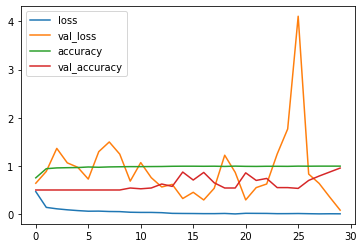

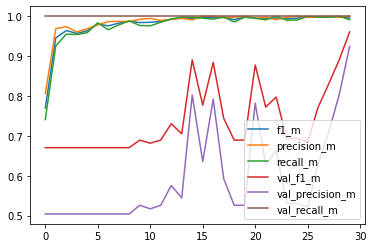

In [24]:
for key in ['loss', 'val_loss', 'accuracy', 'val_accuracy']:
    plt.plot(classifier_model_history.history[key],label=key)
plt.legend()
plt.show()

for key in ['f1_m', 'precision_m', 'recall_m','val_f1_m', 'val_precision_m', 'val_recall_m' ]:
    plt.plot(classifier_model_history.history[key],label=key)
plt.legend()
plt.show()

In [26]:
scores = classifier_pikachu.evaluate(Xtest,Ytest)
print("Test set %s: %.2f%%" % (classifier_pikachu.metrics_names[0], scores[0]*100))
print("Test set %s: %.2f%%" % (classifier_pikachu.metrics_names[1], scores[1]*100))
print("Test set %s: %.2f%%" % (classifier_pikachu.metrics_names[2], scores[2]*100))
print("Test set %s: %.2f%%" % (classifier_pikachu.metrics_names[3], scores[3]*100))

142/142 [==============================] - 6s 42ms/step
Test set loss: 12.46%
Test set accuracy: 95.77%
Test set f1_m: 95.70%
Test set precision_m: 91.87%


In [28]:
y_pred_classifier_scratch = classifier_pikachu.predict(Xtest)
predictions = [1 if predict>=0.9 else 0 for predict in y_pred_classifier_scratch]

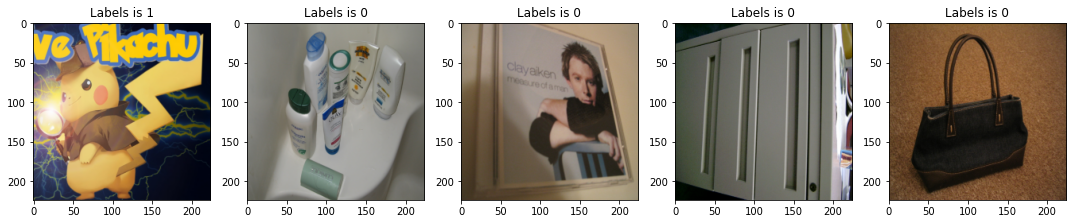

In [30]:
show_images(Xtest,predictions,5)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(Ytest,predictions)

array([[68,  1],
       [ 5, 68]])

In [33]:
y_train_predictions = classifier_pikachu.predict(Xtrain)
predictions_train = [1 if predict>=0.9 else 0 for predict in y_train_predictions]
confusion_matrix(Ytrain,predictions_train)

array([[392,   0],
       [  5, 405]])

### Saving and loading the model.
- first we save the model weights
- we then load the model weights into the function containing the VGG model.
- we then predict normally as if the model is currently trained.

In [35]:
from keras.models import load_model
model = classifier_pikachu
model.save_weights('my_pikachu_weights.h5')  # creates a HDF5 file 'my_model.h5'
print("Saved weights  to gdrive")

Saved weights  to gdrive


In [36]:
pikachu_loaded_model = classifier_pikachu

pikachu_loaded_model.load_weights("/content/my_pikachu_weights.h5")

print("Loading model is completed")

Loading model is completed


In [ ]:
print(pikachu_loaded_model.predict(Xtest))
show_images_basic(Xtest,4)

In [ ]:
def test_new_images(path_folder_image):
  new_images=get_images(path_folder_image)
  NEW_DATA = resizing(224,new_images)
  print(NEW_DATA.shape)
  predictions_12 = pikachu_loaded_model.predict(NEW_DATA)
  return(predictions_12)

predictions_22=test_new_images("/content/cf_testing/pikachu/pikachu_dataset/not_pikachu")


In [54]:
print(predictions_22)

[[2.39514885e-03]
 [2.95514703e-01]
 [4.39390168e-02]
 [1.50761250e-02]
 [1.72351524e-02]
 [3.06873955e-02]
 [9.78957638e-02]
 [2.57989485e-02]
 [2.90759350e-03]
 [8.34286660e-02]
 [3.76169644e-02]
 [5.88185668e-01]
 [1.11512050e-01]
 [3.73470932e-02]
 [5.85782761e-03]
 [1.07645944e-01]
 [2.26759434e-01]
 [5.33808954e-02]
 [3.00333765e-03]
 [1.22642387e-02]
 [2.82338192e-03]
 [6.29067421e-03]
 [4.73763607e-02]
 [1.09245218e-02]
 [1.69716682e-02]
 [1.93324745e-01]
 [3.85285877e-02]
 [4.27597463e-01]
 [7.29272515e-03]
 [1.22733898e-02]
 [5.53378016e-02]
 [1.92156807e-02]
 [2.65800152e-02]
 [1.48948431e-02]
 [6.24777898e-02]
 [1.09379306e-01]
 [2.23053005e-02]
 [3.60811234e-01]
 [1.18136602e-02]
 [2.49074027e-03]
 [2.11812127e-02]
 [3.58797982e-02]
 [2.30156397e-03]
 [1.18294910e-01]
 [1.31220713e-01]
 [3.00569180e-02]
 [3.88483368e-02]
 [7.61246622e-01]
 [2.55933344e-01]
 [3.59635025e-01]
 [1.95746701e-02]
 [8.80132429e-03]
 [8.96664616e-03]
 [4.22011223e-03]
 [1.34531502e-03]
 [1.220443